DATA LOADING

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.utils import to_categorical

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [38]:
df_train_data = pd.read_csv('../input/digit-recognizer/train.csv')
df_test_data = pd.read_csv('../input/digit-recognizer/test.csv')
df_train_data.head(10)
df_test_data.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DESCRIPTION

In [39]:
df_train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [40]:
df_test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


EDA

In [41]:
print(df_train_data.head())
print(df_train_data.info())
print("\n SHape of the dataset:", df_train_data.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [42]:
nan = df_train_data.isnull().sum()
print(nan[nan != 0])
# NO MISSING VALUES 

Series([], dtype: int64)


In [43]:
def display_digits(N):
    
    
    train = df_train_data
    images = np.random.randint(low=0, high=42001, size=N).tolist()
    
    subset_images = train.iloc[images,:]
    subset_images.index = range(1, N+1)
    print("Handwritten picked-up digits: ", subset_images['label'].values)
    subset_images.drop(columns=['label'], inplace=True)

    for i, row in subset_images.iterrows():
        plt.subplot((N//8)+1, 8, i)
        pixels = row.values.reshape((28,28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.title('Randomly picked-up images from the training dataset')
    plt.show()

    return 

Handwritten picked-up digits:  [3 2 2 0 5 1 5 7 6 5 6 5 2 6 0 2 0 7 9 5 8 4 8 8 9 1 6 6 2 2 1 6 4 4 6 3 8
 4 1 2]


/tmp/ipykernel_32/100341375.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_images.drop(columns=['label'], inplace=True)


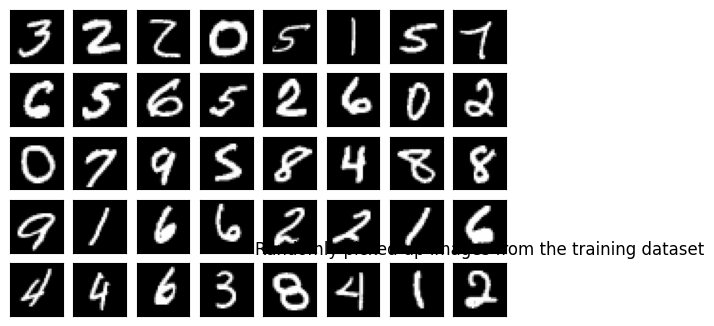

''

In [44]:
display_digits(40)

In [45]:

subset_pixels = df_train_data.iloc[:, 1:]
subset_pixels.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [47]:
train_labels = df_train_data['label']
train1 = df_train_data.drop('label', axis=1)

train1 = np.asarray(train1).astype('float32')/255
test = np.asarray(df_test_data).astype('float32')/255
train1 = train1.reshape(train1.shape[0], 28, 28, 1)
test = test.reshape(test.shape[0], 28, 28, 1)

train_labels = to_categorical(train_labels)

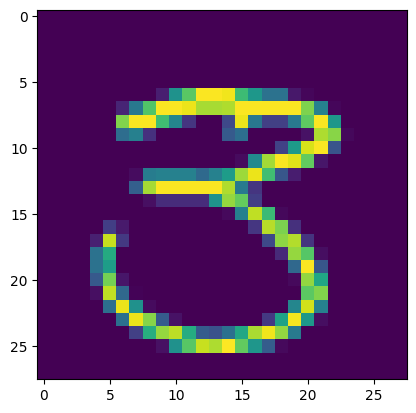

In [48]:
img = train1[7]*255
img_reshape = img.reshape(28, 28)
plt.imshow(img_reshape)
plt.show()

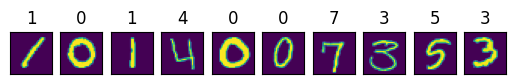

In [49]:

df_train_labels = df_train_data['label']
df_train_data = df_train_data.drop(['label'], axis=1)

for i in range(10):
    ax= plt.subplot(1,10 ,i+1)
    im=ax.imshow(df_train_data.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(df_train_labels.iloc[i])

#PREPROCESSING 

In [51]:
def remove_constant_pixels(pixels_df):
    

    
    changing_pixels_df = pixels_df.loc[:]
    dropped_pixels_b = []

    
    for col in pixels_df:
        if changing_pixels_df[col].max() == 0:
            changing_pixels_df.drop(columns=[col], inplace=True)
            dropped_pixels_b.append(col)
    print("Constantly black pixels that have been dropped: {}".format(dropped_pixels_b))
    
    
    dropped_pixels_w = []
    for col in changing_pixels_df:
        if changing_pixels_df[col].min() == 255:
            changing_pixels_df.drop(columns=[col], inplace=True)
            dropped_pixel_w.append(col)
    print("\n Constantly white pixels that have been dropped: {}".format(dropped_pixels_b))

    print(changing_pixels_df.head())
    print("Remaining pixels: {}".format(len(changing_pixels_df.columns)))
    print("Pixels removed: {}".format(784-len(changing_pixels_df.columns)))
    
    return changing_pixels_df, dropped_pixels_b + dropped_pixels_w



In [53]:
train_pixels_df = pd.read_csv('../input/digit-recognizer/train.csv').drop(columns=['label'])
train_changing_pixels_df, dropped_pixels = remove_constant_pixels(train_pixels_df)

Constantly black pixels that have been dropped: ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel111', 'pixel112', 'pixel139', 'pixel140', 'pixel141', 'pixel168', 'pixel196', 'pixel392', 'pixel420', 'pixel421', 'pixel448', 'pixel476', 'pixel532', 'pixel560', 'pixel644', 'pixel645', 'pixel671', 'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727', 'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel754', 'pixel755', 'pixel756', 'pixel757', 'pixel758', 'pixel759', 'pixel760', 'pixel780', 'pixel781', 'pixel782', 'pixel783']

 Constantly white pixels that have been dropped: ['pixel0', 'pixel1', 'pixel2', 'pixel

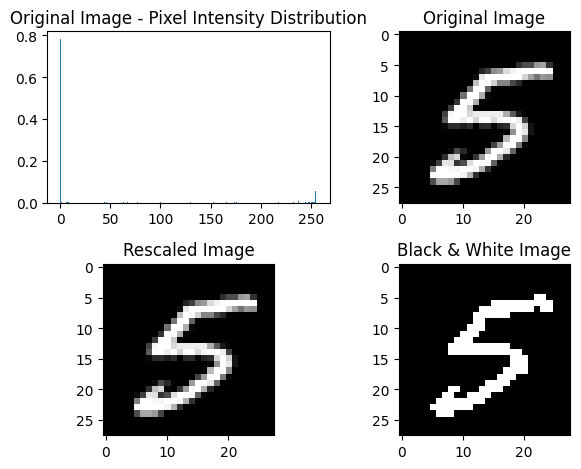

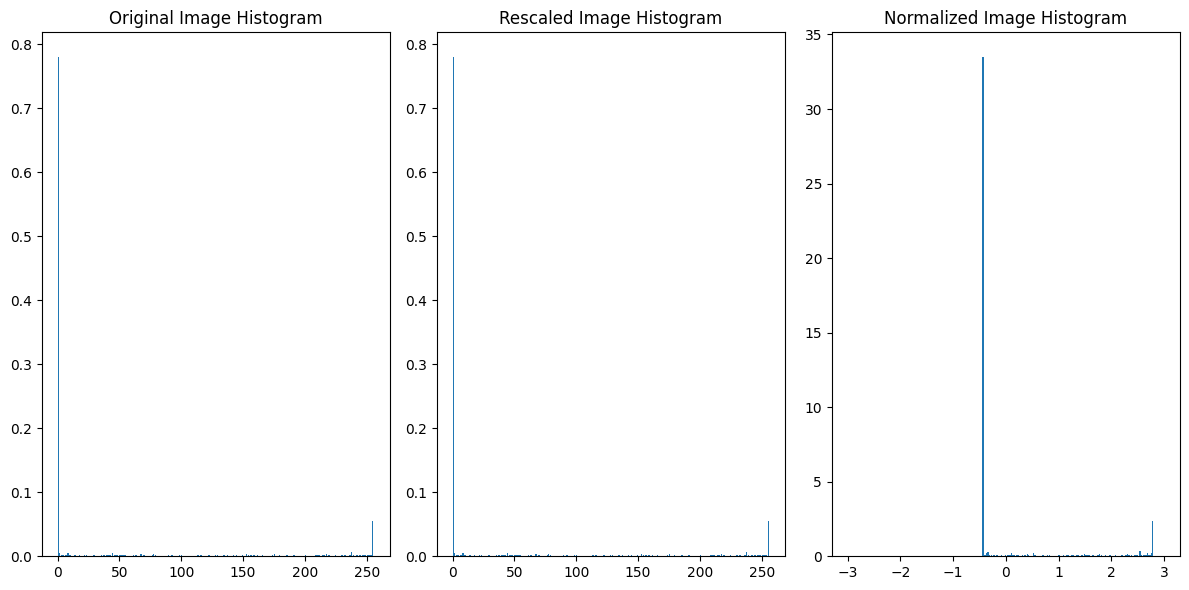

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
train = pd.read_csv('../input/digit-recognizer/train.csv')

i = np.random.randint(low=0, high=42001, size=1).tolist()[0]
pixels = train.iloc[i, 1:]
image = train.iloc[i, 1:].values.reshape((28, 28))

plt.subplot(2, 2, 1)
plt.hist(pixels, bins=256, range=(0, 256), density=True)
plt.title('Original Image - Pixel Intensity Distribution')


pmin, pmax = image.min(), image.max()
rescaled_image = 255 * (image - pmin) / (pmax - pmin)
rescaled_pixels = rescaled_image.flatten()


scaler = StandardScaler()
normalized_pixels = scaler.fit_transform(pixels.values.reshape(-1, 1)).flatten()


bw_pixels = pixels.apply(lambda x: 0 if x < 128 else 255)
bw_image = bw_pixels.values.reshape((28, 28))


plt.subplot(2, 2, 2)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 3)
plt.imshow(rescaled_image, cmap='gray')
plt.title('Rescaled Image')

plt.subplot(2, 2, 4)
plt.imshow(bw_image, cmap='gray')
plt.title('Black & White Image')

plt.tight_layout()


plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(pixels, bins=256, range=(0, 256), density=True)
plt.title('Original Image Histogram')

plt.subplot(1, 3, 2)
plt.hist(rescaled_pixels, bins=256, range=(0, 256), density=True)
plt.title('Rescaled Image Histogram')

plt.subplot(1, 3, 3)
plt.hist(normalized_pixels, bins=256, range=(-3, 3), density=True)
plt.title('Normalized Image Histogram')

plt.tight_layout()

plt.show()


#Image transformation-BLURRING

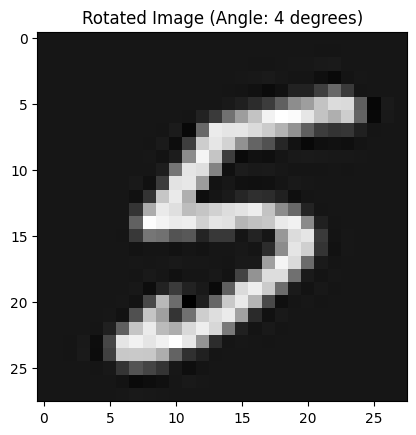

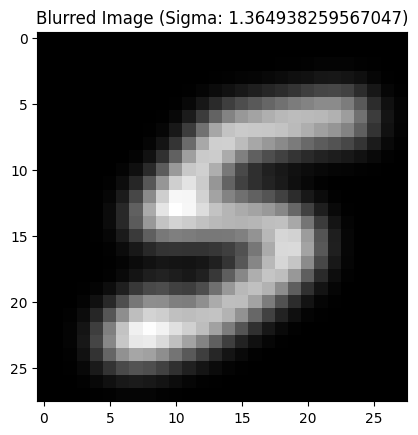

In [55]:
from scipy.ndimage import rotate

angle = np.random.randint(-15, 15)
rotated_image = rotate(image, angle, reshape=False)

plt.figure()
plt.imshow(rotated_image, cmap='gray')
plt.title(f'Rotated Image (Angle: {angle} degrees)')
plt.show()

from scipy.ndimage import gaussian_filter

# Apply Gaussian blur with a random standard deviation (sigma)
sigma = np.random.uniform(0.0, 2.0)  # Adjust the range as needed
blurred_image = gaussian_filter(image, sigma=sigma)

# Visual comparison of the blurred image
plt.figure()
plt.imshow(blurred_image, cmap='gray')
plt.title(f'Blurred Image (Sigma: {sigma})')
plt.show()


In [ ]:
pip install elasticdeform

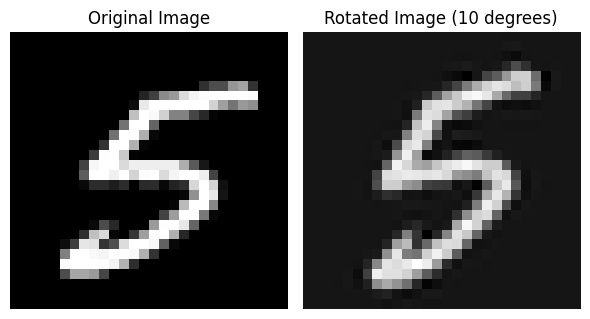

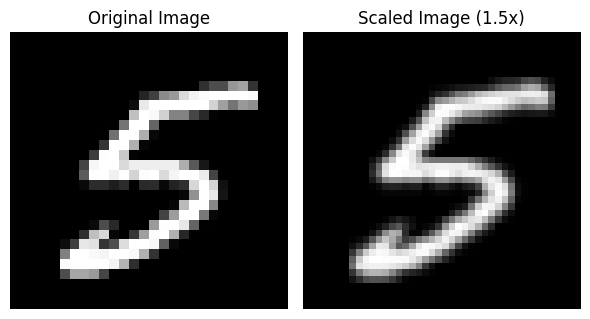

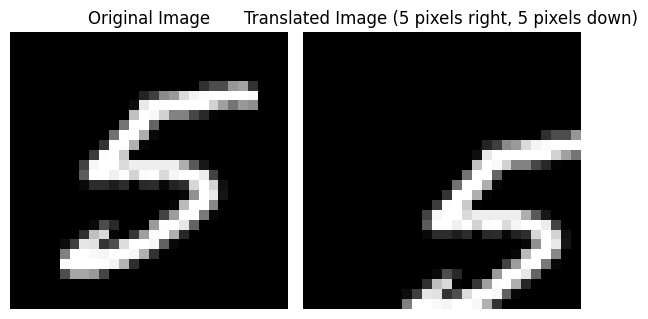

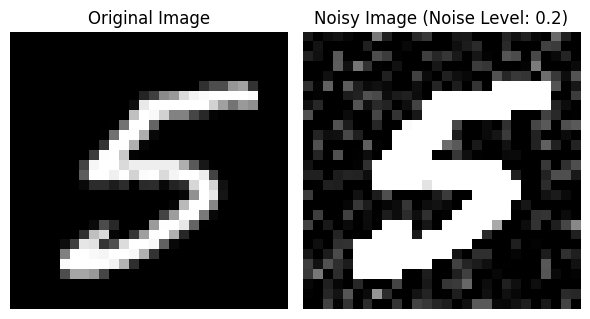

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import rotate, shift
from skimage.transform import rescale


original_image = train.iloc[i, 1:].values.reshape((28, 28))


rotated_image = rotate(original_image, angle=10, reshape=False)
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image (10 degrees)')
plt.axis('off')
plt.tight_layout()
plt.show()


scaled_image = rescale(original_image, scale=1.5, anti_aliasing=True)
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(scaled_image, cmap='gray')
plt.title('Scaled Image (1.5x)')
plt.axis('off')
plt.tight_layout()
plt.show()

translated_image = shift(original_image, shift=(5, 5))
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(translated_image, cmap='gray')
plt.title('Translated Image (5 pixels right, 5 pixels down)')
plt.axis('off')
plt.tight_layout()
plt.show()


def add_noise(image, noise_level):
    noisy_image = image + noise_level * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    return noisy_image

noisy_image = add_noise(original_image, noise_level=0.2)
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Noise Level: 0.2)')
plt.axis('off')
plt.tight_layout()
plt.show()



#KNN

In [57]:
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV


sample = np.random.randint(low=0, high=42001, size=2100).tolist()


X = train_changing_pixels_df.iloc[sample, :].values
y = train.loc[sample, 'label'].values#.reshape(-1,1)
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)


param_grid = {'n_neighbors': np.arange(1,10)}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train, y_train)


best_k = knn_cv.best_params_
best_accuracy = knn_cv.best_score_
print("Best accuracy on test set during training is {} obtained for {}".format(best_accuracy, best_k))
y_pred = knn_cv.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Shape of X and Y arrays: ((2100, 708), (2100,))
Best accuracy on test set during training is 0.8779761904761905 obtained for {'n_neighbors': 1}
Accuracy: 0.9023809523809524
Precision: 0.9074128801802572
Recall: 0.8977861512328777
F1-score: 0.9005319975643479
Confusion Matrix:
 [[38  0  0  0  0  0  0  0  0  1]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 1  0 42  0  0  1  0  1  0  0]
 [ 0  1  0 41  0  0  1  0  1  0]
 [ 0  0  0  0 34  0  0  0  0  7]
 [ 2  0  0  2  0 32  1  0  0  2]
 [ 0  0  0  0  0  1 43  0  0  0]
 [ 0  0  0  0  2  0  0 32  0  4]
 [ 0  2  0  3  1  1  0  0 29  0]
 [ 0  0  0  1  3  0  0  2  0 38]]


In [20]:
import pickle
dbfile = open('KNN.pkl','wb')
pickle.dump(knn_cv,dbfile)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

# Load your preprocessed dataset
# Replace 'X' and 'y' with your feature matrix and target vector
# X should contain the pixel values, and y should contain the labels
X = train_changing_pixels_df  # Replace with your feature matrix
y = train['label']  # Replace with your target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 90.10%
Precision: 0.90
Recall: 0.90
F1-Score: 0.90
Confusion Matrix:
[[772   0   2   3   1  18  14   2   2   2]
 [  0 884  10   2   1   2   1   2   6   1]
 [ 11  21 730  14  17   8  10  12  20   3]
 [  3   2  30 815   1  30   4   7  26  19]
 [  6   6  11   1 755   3  13   3   7  34]
 [ 11   3  11  24  14 589  22   1  23   4]
 [  9   2  15   1   6  13 734   0   5   0]
 [  2   5  10   9  16   2   1 818   3  27]
 [  6  11   9  28   8  26   8   6 721  12]
 [  4   4   7  10  20   9   0  26   8 750]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       816
           1       0.94      0.97      0.96       909
           2       0.87      0.86      0.87       846
           3       0.90      0.87      0.88       937
           4       0.90      0.90      0.90       839
           5       0.84      0.84      0.84       702
           6       0.91      0.94      0.92       785
           7       0.93      0.92 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
import pickle
dbfile = open('LOG.pkl','wb')
pickle.dump(model,dbfile)

In [60]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve,ShuffleSplit
from sklearn.neural_network import MLPClassifier
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# clf = MLPClassifier(hidden_layer_sizes=(32, 16), activation = 'identity', solver='sgd', alpha=0.2, batch_size=32)
clf = MLPClassifier()
clf.fit(X_train, y_train)
# Make predictions on the training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Train Precision: {train_precision:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Train Recall: {train_recall:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Train F1-Score: {train_f1:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

# Calculate and print the confusion matrix
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print("Train Confusion Matrix:")
print(train_confusion_matrix)
print("Test Confusion Matrix:")
print(test_confusion_matrix)

# Generate classification reports
train_classification_report = classification_report(y_train, y_train_pred)
test_classification_report = classification_report(y_test, y_test_pred)

print("Train Classification Report:")
print(train_classification_report)
print("Test Classification Report:")
print(test_classification_report)
print(f'Train Accuracy = {clf.score(X_train, y_train)}')
print(f'Test Accuracy = {clf.score(X_test, y_test)}')

Train Accuracy: 0.99
Test Accuracy: 0.96
Train Precision: 0.99
Test Precision: 0.96
Train Recall: 0.99
Test Recall: 0.96
Train F1-Score: 0.99
Test F1-Score: 0.96
Train Confusion Matrix:
[[3310    0    0    0    0    0    4    0    1    1]
 [   2 3761    6    1    0    0    0    3    2    0]
 [   1    2 3318    2    0    0    0    4    4    0]
 [   4    1   28 3319    1    4    0   20   33    4]
 [   4    6    0    0 3149    0    1   12    3   58]
 [   2    3    2    3    3 3065    1    0   12    2]
 [  14    2    2    0   10    3 3316    0    5    0]
 [   0    1    0    0    0    0    0 3505    2    0]
 [  27    1   15    3    0    0    4    0 3178    0]
 [   6    1    0    6   11    1    0   14   11 3300]]
Test Confusion Matrix:
[[798   0   1   4   1   0   2   1   5   4]
 [  0 900   3   0   1   0   0   3   2   0]
 [  4   4 818   3   5   1   2   2   5   2]
 [  2   3  10 874   0  10   1  11  23   3]
 [  3   1   2   0 780   1   5   7   1  39]
 [  0   0   1  18   1 668   4   0   7   3]
 [

In [25]:
import pickle
dbfile = open('MLP.pkl','wb')
pickle.dump(clf,dbfile)


In [62]:
print("Weights\n", clf.coefs_)

Weights
 [array([[ 1.97338566e-184,  3.48014845e-002,  2.39194457e-002, ...,
        -3.51636792e-177, -2.42494650e-182,  2.17067676e-053],
       [ 3.02472160e-182,  4.12433835e-002,  6.12348720e-002, ...,
        -9.53510480e-183, -1.27964493e-187,  4.66589180e-052],
       [-6.15310985e-179,  1.92214729e-184, -9.10751943e-183, ...,
         2.46102631e-177, -7.31190915e-186,  4.69234429e-052],
       ...,
       [ 1.45906029e-002,  6.32021708e-002,  9.63631819e-002, ...,
         2.08478371e-147, -1.04585325e-179,  3.47908960e-002],
       [-2.69217952e-002, -4.48460643e-092,  1.07975498e-001, ...,
        -2.52941445e-081,  1.02379941e-181, -7.97644611e-002],
       [ 2.79483388e-002, -6.52006861e-146,  1.32727422e-062, ...,
        -8.16638429e-135,  1.49706244e-178, -3.05269496e-121]]), array([[-7.74216591e-02, -2.13404774e-02,  9.92928514e-04,
         1.47893640e-01,  1.13007704e-01, -1.15611946e-01,
         3.17669847e-02,  8.53963856e-02,  3.30074294e-02,
        -6.41032443

In [63]:
print("Total Iteration done : ", clf.n_iter_)
print("Number of layer : ", clf.n_layers_)
print("Number of output : ", clf.n_outputs_)

Total Iteration done :  49
Number of layer :  3
Number of output :  10


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=4)  # You can choose different kernels based on your data

# Fit the SVM classifier to the training data
svm_classifier.fit(X_train, y_train)


# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1-score:", f1_svm)
print("SVM Confusion Matrix:\n", conf_matrix_svm)

In [ ]:
import pickle
dbfile = open('SVM.pkl','wb')
pickle.dump(svm_classifier,dbfile)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


X = train_changing_pixels_df  
y = df_train_data['label'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifiers
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
mlp_classifier = MLPClassifier()
logistic_classifier = LogisticRegression()

classifiers = [knn_classifier, svm_classifier, mlp_classifier, logistic_classifier]
results = []

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({'Algorithm': ['KNN', 'SVM', 'MLP', 'Logistic Regression'], 'Accuracy': results})

# Perform one-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import kruskal

# Extract data for each algorithm
algorithm_data = [results_df[results_df['Algorithm'] == algorithm]['Accuracy'] for algorithm in results_df['Algorithm'].unique()]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*algorithm_data)

print("Kruskal-Wallis H-test:")
print(f"H-statistic: {h_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis; there is a significant difference among algorithms.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference among algorithms.")


VISUALISATION

           pixel12   pixel13   pixel14   pixel15   pixel32   pixel33  \
pixel12   1.000000  0.814611  0.085865  0.085865 -0.000026 -0.000030   
pixel13   0.814611  1.000000  0.647812  0.647812 -0.000034 -0.000039   
pixel14   0.085865  0.647812  1.000000  1.000000 -0.000024 -0.000027   
pixel15   0.085865  0.647812  1.000000  1.000000 -0.000024 -0.000027   
pixel32  -0.000026 -0.000034 -0.000024 -0.000024  1.000000  0.985821   
...            ...       ...       ...       ...       ...       ...   
pixel775 -0.000133 -0.000174 -0.000123 -0.000123 -0.000123 -0.000142   
pixel776 -0.000095 -0.000124 -0.000088 -0.000088 -0.000088 -0.000101   
pixel777 -0.000061 -0.000079 -0.000056 -0.000056 -0.000056 -0.000065   
pixel778 -0.000048 -0.000063 -0.000044 -0.000044 -0.000044 -0.000051   
pixel779 -0.000036 -0.000047 -0.000034 -0.000034 -0.000034 -0.000039   

           pixel34   pixel35   pixel36   pixel37  ...  pixel770  pixel771  \
pixel12  -0.000049 -0.000062 -0.000086 -0.000108  ... -0.0

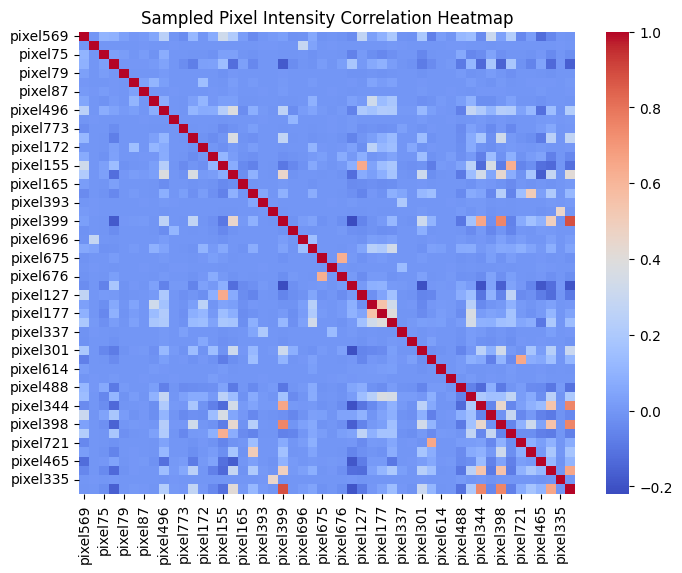

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = train_changing_pixels_df.corr()
print(correlation_matrix)
sample_size = 50  
sample_indices = np.random.choice(correlation_matrix.shape[0], size=sample_size, replace=False)
sampled_corr_matrix = correlation_matrix.iloc[sample_indices, sample_indices]

plt.figure(figsize=(8, 6))
sns.heatmap(sampled_corr_matrix, cmap='coolwarm', annot=False)
plt.title('Sampled Pixel Intensity Correlation Heatmap')
plt.show()

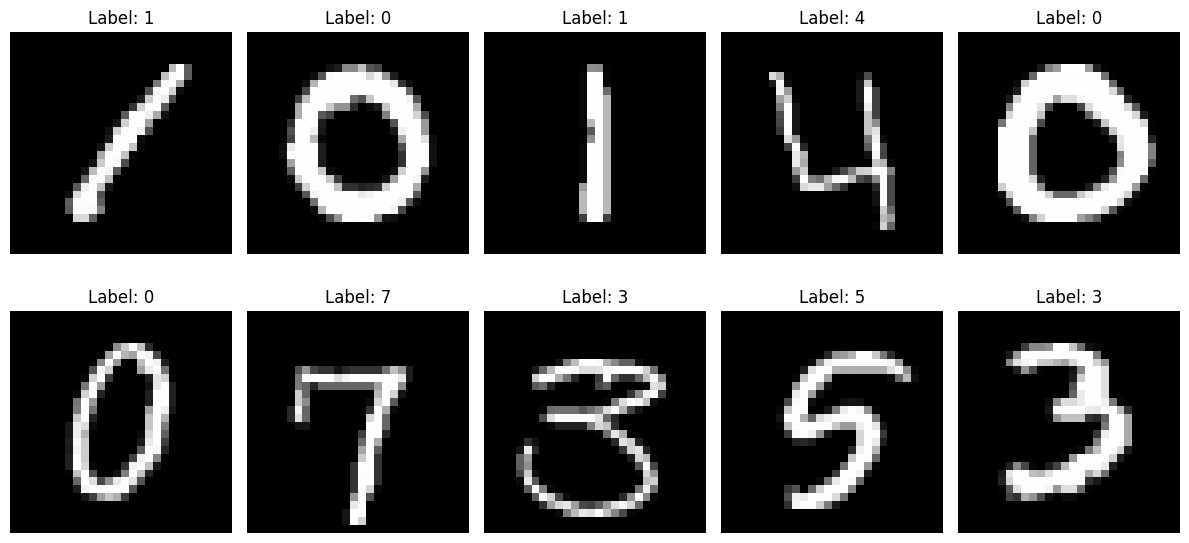

In [29]:

df_train_data = pd.read_csv('../input/digit-recognizer/train.csv')
X_train = df_train_data.drop(columns=['label']).values
y_train = df_train_data['label'].values# Create a function to visualize digits

def visualize_digits(images, labels, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {labels[i]}", fontsize=12)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the first 10 digits
visualize_digits(X_train[:10], y_train[:10])

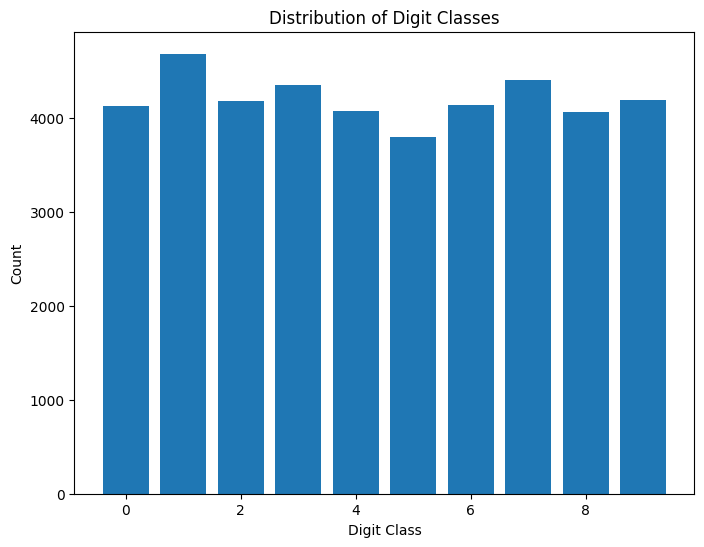

In [13]:
# Visualize the distribution of digit classes
digit_counts = df_train_data['label'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(digit_counts.index, digit_counts.values)
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.title('Distribution of Digit Classes')
plt.show()

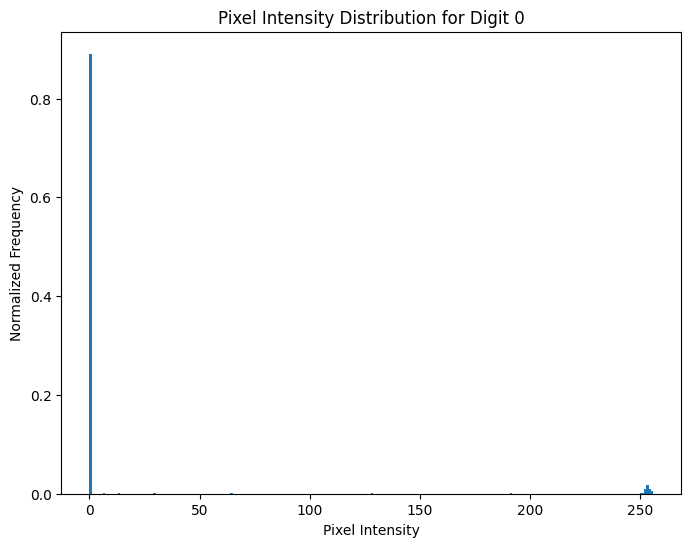

In [30]:
# Visualize pixel intensity distribution for digit '0'
digit_0_pixels = X_train[y_train == 1]
plt.figure(figsize=(8, 6))
plt.hist(digit_0_pixels.flatten(), bins=256, range=(0, 256), density=True)
plt.title('Pixel Intensity Distribution for Digit 0')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.show()

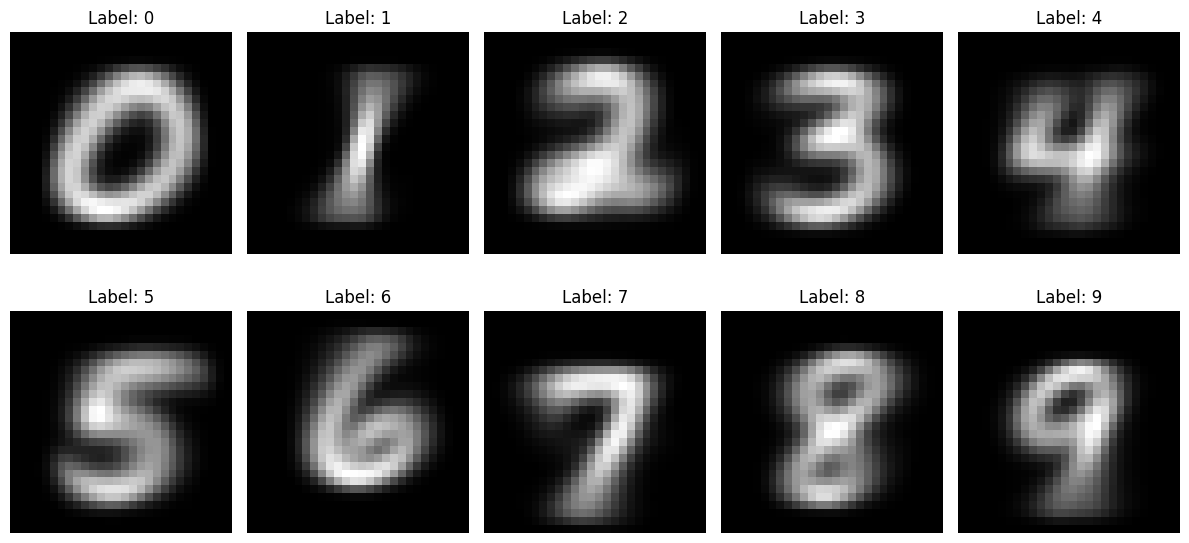

In [31]:
# Compute and visualize the average image for each digit class
digit_classes = np.unique(y_train)
avg_digit_images = [np.mean(X_train[y_train == digit], axis=0) for digit in digit_classes]
visualize_digits(avg_digit_images, digit_classes)

In [ ]:
import seaborn as sns

# Create a pair plot of pixel intensities (select a subset for faster plotting)
subset = df_train_data.sample(1000, random_state=42)
sns.pairplot(subset, hue='label')
plt.title('Pair Plot of Pixel Intensities')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your machine learning model 
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot misclassified digits
misclassified_idx = np.where(y_test != y_pred)[0]
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}\nPredicted: {y_pred[idx]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['KNN', 'LOGISTIC', 'MLP', 'SVM']
accuracies = [0.90, 0.90, 0.96, 0.92]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracies', fontsize=16)

# Add data labels
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the appearance
plt.xticks(rotation=45)
plt.ylim(0.85, 1.0)
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


NameError: name 'model' is not defined